In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Video

%matplotlib notebook

In [2]:
img_path = 'thai.jpg'

In [3]:
img_bgr = cv2.imread(img_path)
img_bgr_resize = cv2.resize(img_bgr,(img_bgr.shape[1]//4,img_bgr.shape[0]//4))
img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)
img_gray.shape

(191, 256)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f03f2a31690>,
 <matplotlib.image.AxesImage at 0x7f03f295ba50>)

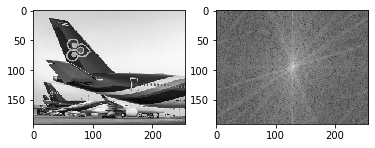

In [4]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(magnitude_spectrum, 'gray')

In [5]:
M, N = img_gray.shape
M, N

(191, 256)

In [6]:
ruv = lambda u,v : math.sqrt(math.pow(u - M/2, 2) + math.pow(v - N/2, 2))

In [7]:
Huv = lambda r0, u, v : 1 -math.pow(math.e,   (-math.pow(ruv(0, 0), 2)) / (2*math.pow(r0, 2))   )

In [8]:
r0 = 100

array([ 19,  38,  57,  76,  96, 115, 134, 153, 172, 191])

In [9]:
h = [[Huv(r0, u,v) for u in range(N)] for v in range(M)]

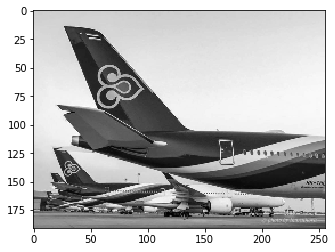

In [10]:
img_back = np.fft.ifft2(h * fshift)
img_back = np.round(np.abs(img_back))
plt.imshow(img_back, 'gray')